# Tutorial Fast Fourier Transforms (FFTs)

### Tutor: Julio C. da Silva (Néel Institute CNRS, Grenoble, France) /  email: julio-cesar.da-silva@neel.cnrs.fr
#### Personal webpage: https://sites.google.com/view/jcesardasilva

##### Disclaimer: This notebook is intended from educational reasons only and should not be use for professional data analysis. For the latter, there are other more efficient and complete codes available. 

This code run in **Python3** and requires certain python packages, which are: **Numpy, IPython, Matplotlib, Scikit-Image**

If you do not have those packages, I suggest their installation via pip install: 

    pip3 install numpy, ipython, matplotlib, scikit-image

## Playing with Fourier Transforms
In this code, we will play with the Fourier Transforms. We will find out the importance of phases in the transformation and role of the low and the high frequencies

In [41]:
%matplotlib inline
#%matploblib notebook # uncomment this line if you want to "manipulate" the images
# standard python packages
import time

# third party packages
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure
from skimage.transform import resize

## Preparation of the images to be Fourier transformed

In [91]:
amplitude = data.camera() # cameraman 512 x 512 pixels
phase = data.astronaut().mean(axis=2) # astronaut 512 x 512 pixels. Used mean to average the 3 color channels

## Rescale the phase to [-pi, pi] to avoid phase wrapping

In [92]:
phase = exposure.rescale_intensity(phase, out_range=(-np.pi, np.pi))
cimg = amplitude*np.exp(1j*phase)

## Display the complex image

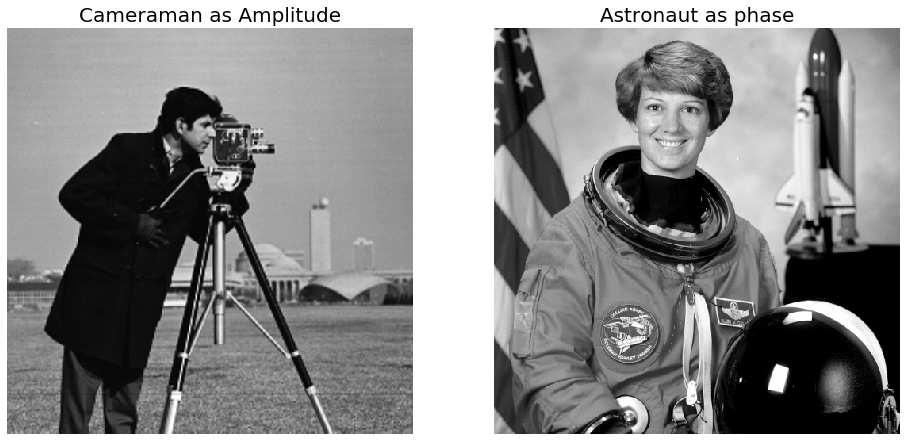

In [93]:
# display the complex images
fig1 = plt.figure(1,figsize=(16,8))
ax11 = fig1.add_subplot(121)
ax11.imshow(np.abs(cimg),cmap='gray') # amplitude
ax11.set_title('Cameraman as Amplitude',fontsize = 20)
plt.axis('off')
ax12 = fig1.add_subplot(122)
ax12.imshow(np.angle(cimg),cmap='gray') # phase
ax12.set_title('Astronaut as phase',fontsize = 20)
plt.axis('off')
plt.show(block=False)

## Calculate the Fourier transform of the complex image

In [106]:
# apodization of the images to avoid edge effects in the images
window = np.outer(np.hanning(cimg.shape[0]),np.hanning(cimg.shape[1]))
apod_cimg = cimg*window
# direct fourier transform
fft_cimg = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(apod_cimg)))

## Display amplitude and phase of the Fourier transformed images

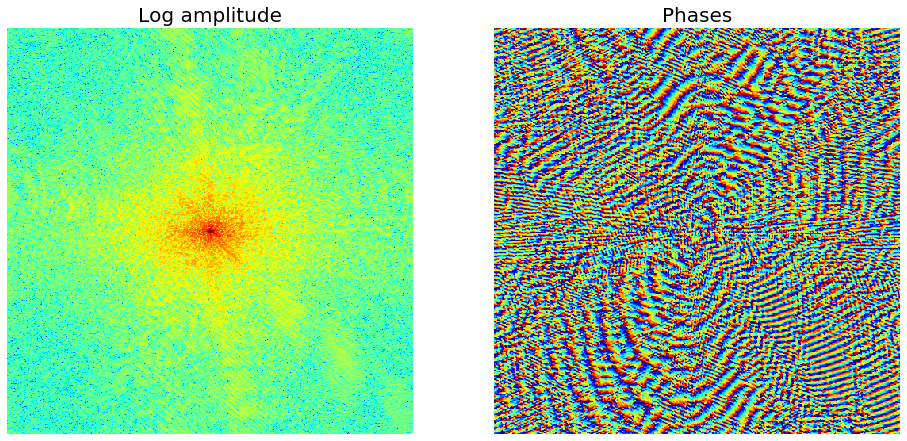

In [107]:
# display the Fourier transform
eps = 0.0001 # small value to prevent zeros in the log
fig2 = plt.figure(2,figsize=(16,8))
ax21 = fig2.add_subplot(121)
ax21.imshow(np.log(np.abs(fft_cimg)+eps),cmap='jet',origin='lower')
ax21.set_title('Log amplitude',fontsize = 20)
plt.axis('off')
ax22 = fig2.add_subplot(122)
ax22.imshow(np.angle(fft_cimg),cmap='jet',origin='lower')
ax22.set_title('Phases',fontsize = 20)
plt.axis('off')
plt.show(block=False)